In [14]:
import os
import numpy as np
import pandas as pd

path = "/Users/prati/Downloads/Compressed/Extractive_Summartization-master/Necessary Codes/dataframes/"

data = pd.DataFrame()

for i in os.listdir(path):
    df = pd.read_pickle(path+i)
    df['temp_col_len'] = df.full.str.len()
    print(i)
    data = pd.concat([data, df[df['temp_col_len']>1].drop(columns = ['temp_col_len'])], axis = 0, ignore_index=True)
data

dataframe_processed_0_to_29.pickle
dataframe_processed_120_to_149.pickle
dataframe_processed_150_to_179.pickle
dataframe_processed_180_to_209.pickle
dataframe_processed_210_to_239.pickle
dataframe_processed_240_to_269.pickle
dataframe_processed_270_to_299.pickle
dataframe_processed_30_to_59.pickle
dataframe_processed_60_to_89.pickle
dataframe_processed_90_to_119.pickle


,summary,full,full_orignal,Id
0,appellant terminate organization workman numbe...,judgment order date date number organization h...,"from the judgment and order dated march 12, 19...",0
1,date respondent number obtain decree appellant...,rom judgment order date date number organizati...,"rom the judgment and order dated march 21, 196...",1
2,country organization limited organization*carr...,judgment order date date number calcutta high ...,"the judgment and order dated january 7, 1966 o...",2
3,notice number 22(2 person tax number number co...,judgment order date date number person high or...,"he judgment and order dated march 21, 1966 of ...",3
4,number b j partner firm carry business entitle...,number organization special leave judgment ord...,"6. appeals by special leave from, the judgment...",4
...,...,...,...,...
295,assessee company hold certain share organizati...,ls certificate special leave judgment order da...,ls by certificate/special leave from the judgm...,115
296,organization organization officer issue notice...,ls special leave judgment order date date numb...,ls by special leave from the judgment and orde...,116
297,question whether amount represent interest amo...,order date date number assam nagaland high org...,"and order dated august 22, 1966 of the assam a...",117
298,dispute date raise organization appellant comp...,award date date number organization person per...,"from the award dated february 18, 1970 of the ...",118


In [3]:
GS_index = (np.array(data.index))[-50:]
GS_index

array([250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262,
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299], dtype=int64)

In [4]:
# Sentence tokenization
# and tagging of document number t sentences

temp = data.copy()

set = temp.index
# set = np.arange(0, 51, 1)
# set = [0, 1, 2]

# temp = data

full_sent = pd.DataFrame()
summ_sent = pd.DataFrame()

full_docs = []
summ_docs = []
GS_docs = []

ori_sent = pd.DataFrame()
GS_sent = pd.DataFrame()
GS_ori_sent = pd.DataFrame()

for i in set:
  if i not in GS_index:
    full = temp['full'].iloc[i]
    summary = temp['summary'].iloc[i]
    ori = temp['full_orignal'].iloc[i]
    
#     print(full)
#     break
    v = full.split("*")    
    t1 = pd.DataFrame(v)
    
    v = summary.split('*')
    t2 = pd.DataFrame(v)
    
    v = ori.split('*')
    t5 = pd.DataFrame(v)
    
    t3 = np.linspace(i, i, num = len(t1))
    t4 = np.linspace(i, i, num = len(t2))

    # print(t1)
    
    if(len(t1)==len(t5)):
        full_docs = np.append(full_docs, t3)
        summ_docs = np.append(summ_docs, t4)
        full_sent = pd.concat([full_sent, t1], ignore_index=True)
        summ_sent = pd.concat([summ_sent, t2], ignore_index=True)
        ori_sent = pd.concat([ori_sent, t5], ignore_index=True)
    else:
        print("Doc No. : ", i,"has a problem")
  
  else:
    full = temp['full'].iloc[i]
    v = full.split("*")    
    t1 = pd.DataFrame(v)

    ori = temp['full_orignal'].iloc[i]
    v = ori.split('*')
    t5 = pd.DataFrame(v)

    t3 = np.linspace(i, i, num = len(t1))

    if(len(t1)==len(t5)):
        GS_docs = np.append(GS_docs, t3)
        GS_sent = pd.concat([GS_sent, t1], ignore_index=True)
        GS_ori_sent = pd.concat([GS_ori_sent, t5], ignore_index=True)
    else:
      print("GS Doc No. : ", i-1060,"has a problem")

print('summary sentence tokenization')
print(len(summ_docs))
print(len(summ_sent))
print(len(full_docs))
print(len(full_sent))
print(len(ori_sent))

print(len(GS_docs))
print(len(GS_sent))
print(len(GS_ori_sent))

# summ_sent_mod = pd.DataFrame(summ_sent, columns=['Summary_Sentences'])
summ_sent_mod = summ_sent.set_axis(['Sentences'], axis=1, inplace=False)
# summ_sent_mod

full_sent_mod = full_sent.set_axis(['Sentences'], axis=1, inplace=False)
# full_sent_mod

Doc No. :  12 has a problem
Doc No. :  31 has a problem
Doc No. :  47 has a problem
Doc No. :  52 has a problem
Doc No. :  68 has a problem
Doc No. :  87 has a problem
Doc No. :  98 has a problem
Doc No. :  115 has a problem
Doc No. :  118 has a problem
Doc No. :  121 has a problem
Doc No. :  131 has a problem
Doc No. :  147 has a problem
Doc No. :  150 has a problem
Doc No. :  151 has a problem
Doc No. :  160 has a problem
Doc No. :  168 has a problem
Doc No. :  185 has a problem
Doc No. :  193 has a problem
Doc No. :  194 has a problem
Doc No. :  205 has a problem
Doc No. :  209 has a problem
Doc No. :  221 has a problem
summary sentence tokenization
6492
6492
31302
31302
31302
5592
5592
5592


C:\Users\prati\AppData\Local\Temp\ipykernel_12480\832178143.py:84: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  summ_sent_mod = summ_sent.set_axis(['Sentences'], axis=1, inplace=False)
C:\Users\prati\AppData\Local\Temp\ipykernel_12480\832178143.py:87: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  full_sent_mod = full_sent.set_axis(['Sentences'], axis=1, inplace=False)


In [5]:
# combining summary and full-text sentences for tfidf vectorization of sentences

# -----------------------------------------------------------------------------------------------------------------------------

GS_sent_mod = GS_sent.set_axis(['Sentences'], axis=1, inplace=False)

tmp1 = pd.DataFrame(summ_sent_mod)
tmp2 = pd.DataFrame(full_sent_mod)
tmp3 = pd.DataFrame(GS_sent_mod)
combined = pd.concat([tmp1, tmp2], axis = 0, ignore_index=True, sort = False)
combined = pd.concat([combined, tmp3], axis = 0, ignore_index=True, sort = False)
combined.columns = ['sents']

# -----------------------------------------------------------------------------------------------------------------------------

print(combined.shape)

(43386, 1)


C:\Users\prati\AppData\Local\Temp\ipykernel_12480\666061319.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  GS_sent_mod = GS_sent.set_axis(['Sentences'], axis=1, inplace=False)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer as tuttu
from nltk.tokenize import RegexpTokenizer
import scipy

# -----------------------------------------------------------------------------------------------------------------------------

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf_func = tuttu(ngram_range = (1, 1), tokenizer = token.tokenize, lowercase = True)
tfidf = tfidf_func.fit_transform(combined['sents'])

# -----------------------------------------------------------------------------------------------------------------------------

tfidf.shape

C:\Users\prati\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(43386, 13650)

In [7]:
# dimension reduction
from sklearn.decomposition import PCA, TruncatedSVD

svd = TruncatedSVD(100)
a = svd.fit_transform(tfidf[:,:])

del tfidf

print(a.shape)
print(a)

(43386, 100)
[[ 0.22545967  0.19661257  0.08339841 ... -0.06886427 -0.0516008
  -0.09990463]
 [ 0.02054615  0.05342865 -0.00734933 ... -0.08917633  0.02061192
  -0.11754031]
 [ 0.06522839  0.16492915  0.03256329 ... -0.00947459 -0.06728629
  -0.00674841]
 ...
 [ 0.21481762  0.11483838 -0.07252053 ...  0.02992236 -0.02906369
   0.02342067]
 [ 0.19868809  0.10113967 -0.1232893  ...  0.04314284 -0.06284426
  -0.01449945]
 [ 0.01138451  0.03321574 -0.01262209 ... -0.01370993 -0.01384952
   0.00108961]]


In [12]:
# ## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
     numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
     start_mem = df.memory_usage().sum() / 1024**2    
     for col in df.columns:
         col_type = df[col].dtypes
         if col_type in numerics:
             c_min = df[col].min()
             c_max = df[col].max()
             if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                 df[col] = df[col].astype(np.float16)
             elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                 df[col] = df[col].astype(np.float32)
             else:
                 df[col] = df[col].astype(np.float64)  
         if(col%20==0):
             print("column no : ", col, " done!")
     end_mem = df.memory_usage().sum() / 1024**2
     if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
     return df

x2 = pd.DataFrame(a)
x2 = reduce_mem_usage(x2)

column no :  0  done!
column no :  20  done!
column no :  40  done!
column no :  60  done!
column no :  80  done!
Mem. usage decreased to  8.28 Mb (75.0% reduction)


In [13]:
x2 = pd.DataFrame(a)
print(x2.shape)

summ_tfidf = x2.iloc[:len(summ_sent_mod)]
full_tfidf = x2.iloc[len(summ_sent_mod):len(summ_sent_mod)+len(full_sent_mod)]
GS_tfidf = x2.iloc[len(summ_sent_mod)+len(full_sent_mod):]

print(len(summ_docs))
print(len(full_docs))
print(len(GS_docs))

summ_tfidf['doc_id'] = summ_docs
full_tfidf['doc_id'] = full_docs
GS_tfidf['doc_id'] = full_docs

full_tfidf

(43386, 100)
6492
31302
5592


C:\Users\prati\AppData\Local\Temp\ipykernel_12480\1545955771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summ_tfidf['doc_id'] = summ_docs
C:\Users\prati\AppData\Local\Temp\ipykernel_12480\1545955771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_tfidf['doc_id'] = full_docs


ValueError: Length of values (31302) does not match length of index (5592)

In [15]:
from sklearn import preprocessing

# -----------------------------------------------------------------------------------------------------------------------------

summ_tfidf_normalized = preprocessing.normalize(summ_tfidf.drop(['doc_id'], axis=1), norm='l2')
summ_tfidf_normalized = pd.DataFrame(summ_tfidf_normalized)
summ_tfidf_normalized.columns = summ_tfidf.drop(['doc_id'], axis=1).columns
summ_tfidf_normalized['doc_id'] = np.array(summ_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------

full_tfidf_normalized = preprocessing.normalize(full_tfidf.drop(['doc_id'], axis=1), norm='l2')
full_tfidf_normalized = pd.DataFrame(full_tfidf_normalized)
full_tfidf_normalized.columns = full_tfidf.drop(['doc_id'], axis=1).columns
full_tfidf_normalized['doc_id'] = np.array(full_tfidf.doc_id)

# -----------------------------------------------------------------------------------------------------------------------------

summ_tfidf_normalized

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,doc_id
0,0.309602,0.269989,0.114523,-0.048148,-0.093994,-0.008508,0.368344,0.286362,0.141913,-0.180013,...,0.014303,-0.017148,0.063874,0.034662,0.038320,0.031185,-0.094565,-0.070858,-0.137189,0.0
1,0.039827,0.103566,-0.014246,0.021063,-0.001608,0.035414,0.323478,0.233877,-0.227225,-0.025632,...,0.048202,-0.044236,-0.033252,-0.047704,0.074631,-0.042481,-0.172860,0.039954,-0.227841,0.0
2,0.159261,0.402689,0.079506,0.127122,-0.070914,-0.023144,-0.018934,-0.045190,-0.062744,-0.050049,...,0.011555,0.139718,-0.040925,0.040965,-0.060008,-0.053689,-0.023133,-0.164285,-0.016477,0.0
3,0.066653,0.167758,0.092115,0.052338,-0.026232,0.051712,0.156616,-0.111374,-0.082163,0.008800,...,0.238482,0.071928,0.216995,0.157105,-0.138588,-0.138790,0.065258,-0.200780,0.013433,0.0
4,0.113887,0.266723,0.207911,0.068051,0.200306,0.013357,0.084001,-0.127633,-0.145793,0.003962,...,0.086296,-0.018779,0.050189,0.107927,-0.064840,-0.091066,-0.013856,-0.216136,0.000406,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,0.754370,-0.188963,-0.142927,0.146435,-0.013781,-0.045677,-0.010230,-0.019528,-0.028462,0.006679,...,-0.074540,-0.035748,0.015047,-0.072192,-0.012852,0.014156,0.107878,0.054422,0.107639,249.0
6488,0.191573,0.544679,-0.295848,-0.628105,-0.178449,-0.147556,-0.178487,0.069509,-0.002487,-0.098065,...,-0.014445,0.031832,0.052742,0.015464,0.022466,0.034265,-0.020873,0.040352,0.000648,249.0
6489,0.221481,0.553334,0.470088,0.017781,0.199466,-0.064244,-0.127000,-0.032315,0.006670,0.039644,...,-0.007167,-0.005959,0.008443,-0.011620,0.001367,0.018488,0.002621,0.002667,0.005781,249.0
6490,0.896376,-0.346637,-0.002851,-0.025906,-0.019767,-0.021240,0.017022,-0.022763,-0.023021,0.015080,...,-0.050278,-0.037579,0.033551,-0.076125,-0.036205,0.009237,0.107351,0.057580,0.097738,249.0


In [16]:
A = [[2,3],[5,4]]
preprocessing.normalize(A, norm='l2')

array([[0.5547002 , 0.83205029],
       [0.78086881, 0.62469505]])

In [17]:
cosine_vec = []

# -----------------------------------------------------------------------------------------------------------------------------

for i in set:
  tmp_full_sent = summ_tfidf_normalized[summ_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)
  tmp_summ_sent = full_tfidf_normalized[full_tfidf_normalized.doc_id==i].drop(['doc_id'], axis=1)

  M = tmp_summ_sent.dot(np.transpose(tmp_full_sent))
  cos_doc = (np.amax(M, axis = 1))
  cosine_vec = np.append(cosine_vec, cos_doc)

# -----------------------------------------------------------------------------------------------------------------------------

len(cosine_vec)

31302

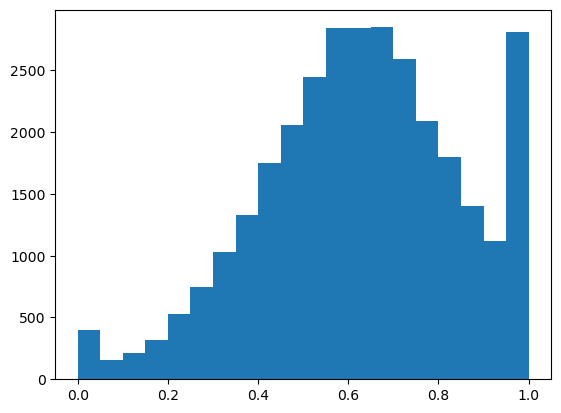

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------------------------------------------------------

plt.hist(cosine_vec, bins=20)
plt.show()